In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# EDA
## 01. 데이터 수집 및 로딩

In [14]:
import pandas as pd

df = pd.read_csv('./data/Employee_Attrition.csv')


## 02. 데이터 구조 및 변수 이해
### 1) Feature 설명
- 총 35개의 변수로 구성.

###### Age 직원의 나이
###### Attrition  이직 여부 (Yes: 이직함, No: 이직 안함) — **Target 변수**
###### BusinessTravel  출장 빈도 (Travel_Rarely, Travel_Frequently, Non-Travel)
###### DailyRate  일일 급여
###### Department  소속 부서 (Sales, Research & Development, Human Resources)
###### DistanceFromHome  집과 직장 간 거리
###### Education  교육 수준 (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)
###### EducationField  전공 분야 (Life Sciences, Medical, Marketing 등)
###### EmployeeCount  항상 1로 고정된 값 (사용하지 않는 더미 컬럼)
###### EmployeeNumber  직원 고유 식별 번호 (ID)
###### EnvironmentSatisfaction  근무 환경 만족도 (1: 낮음 ~ 4: 높음)
###### Gender  성별 (Male, Female)
###### HourlyRate  시간당 급여
###### JobInvolvement  직무 몰입도 (1: 낮음 ~ 4: 높음)
###### JobLevel  직급 (1: 하위직급 ~ 5: 상위직급)
###### JobRole  직무 역할 (Sales Executive, Laboratory Technician 등)
###### JobSatisfaction  직무 만족도 (1: 낮음 ~ 4: 높음)
###### MaritalStatus  결혼 여부 (Single, Married, Divorced)
###### MonthlyIncome 월 급여
###### MonthlyRate 월 기준 급여 (월간 총 급여 스케일)
###### NumCompaniesWorked 지금까지 근무한 회사 수
###### Over18항상 ‘Y’ (무의미 컬럼)
###### OverTime 야근 여부 (Yes/No)
###### PercentSalaryHike 이전 평가 대비 급여 인상 비율 (%)
###### PerformanceRating 성과 평가 점수 (1~4)
###### RelationshipSatisfaction 직장 내 관계 만족도 (1~4)
###### StandardHours 항상 80 (고정값 — 무의미 컬럼)
###### StockOptionLevel 스톡옵션 수준 (0~3)
###### TotalWorkingYears 총 경력(연수)
###### TrainingTimesLastYear 작년 한 해 동안의 교육 이수 횟수
###### WorkLifeBalance 일과 삶의 균형 (1: 낮음 ~ 4: 높음)
###### YearsAtCompany 현재 회사에서의 근속 연수
###### YearsInCurrentRole 현 직무에서 일한 기간
###### YearsSinceLastPromotion 최근 승진 후 경과 연수
###### YearsWithCurrManager 현재 매니저와 함께 일한 기간


- 전체 샘플 수 : 1470
- 결측치 없음

In [18]:
# print(df.shape)
# print(df.dtypes)
# print(df.columns)
# print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 03. 데이터 요약 및 기술 통계

- 전체 샘플 수 : 1470개
- Age: 평균 나이는 약 36.9세, 최저 18세, 최고 60세
- MonthlyIncome 관련 컬럼은 HourlyRate, DailyRate 등과 함께 직무 보상 수준을 보여주는 변수 예: HourlyRate는 평균 66, 최대 100으로 고임금 직군 존재
- TotalWorkingYears, YearsAtCompany 등은 직무 경험을 나타내며, 최대 40년까지 있음 → 고경력자 존재
- YearsSinceLastPromotion: 평균은 약 2.2년이지만 0년이 최빈값, 즉 승진 경험이 적은 직원이 많음
- WorkLifeBalance, EnvironmentSatisfaction, JobSatisfaction 등은 1~4 점수체계로 만족도/균형 상태를 평가

#### 클래스 불균형을 가진 데이터셋

- Attrition - No 가 84% 비율을 차지
- Accuracy 보다 Recall, Precision, F1 Score가 중요함

In [19]:
print(df.describe())
print(df['Attrition'].value_counts())  # 타깃 예시


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

## 04. 결측치 및 이상치 탐색

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

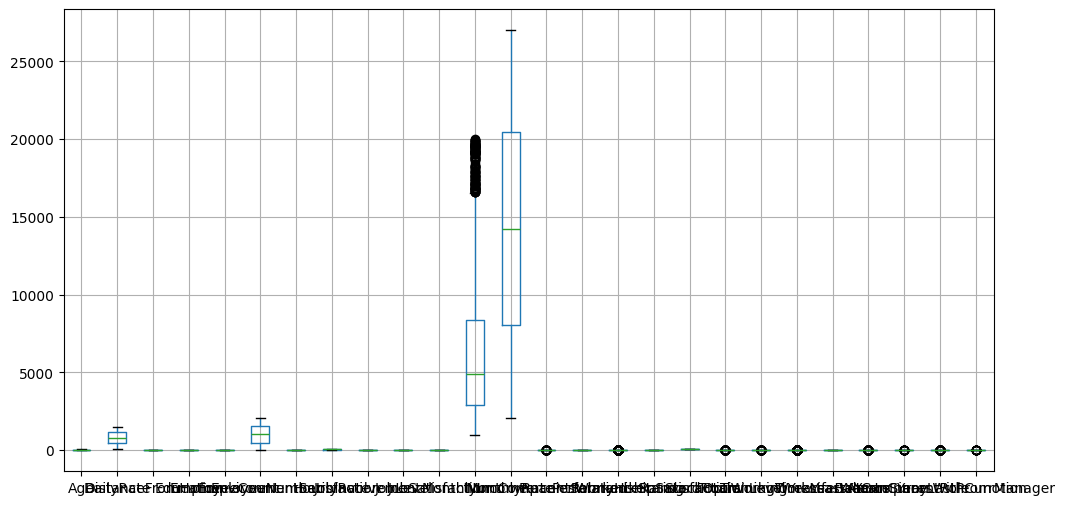

In [20]:
print(df.isnull().sum())
df.boxplot(figsize=(12, 6))


## 05. 변수 분포 시각화

In [23]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


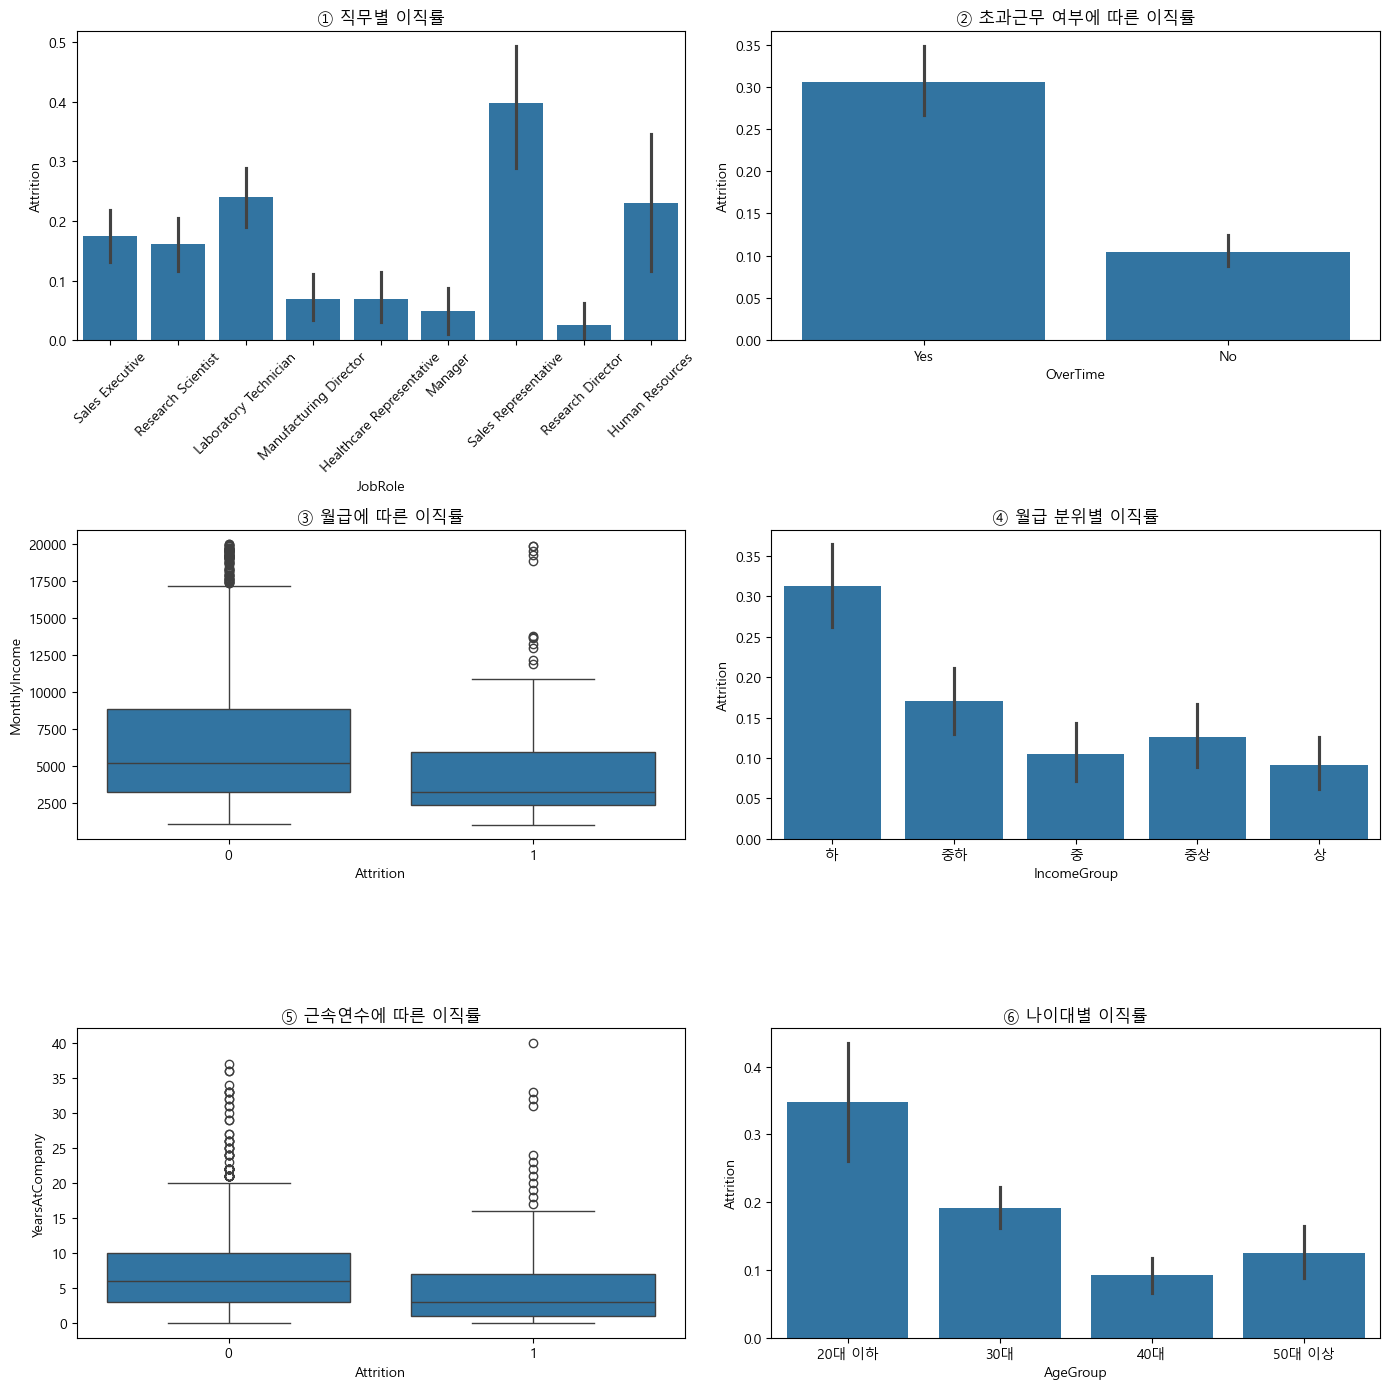

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('data/Employee_Attrition.csv')

# 이직 여부 숫자화
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 시각화 준비
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# ① 직무별 이직률
sns.barplot(x='JobRole', y='Attrition', data=df, ax=axes[0, 0])
axes[0, 0].set_title('① 직무별 이직률')
axes[0, 0].tick_params(axis='x', rotation=45)

# ② 초과근무 여부에 따른 이직률
sns.barplot(x='OverTime', y='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('② 초과근무 여부에 따른 이직률')

# ③ 월급에 따른 이직률 (boxplot)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[1, 0])
axes[1, 0].set_title('③ 월급에 따른 이직률')

# ④ 월급 분위별 이직률
df['IncomeGroup'] = pd.qcut(df['MonthlyIncome'], 5, labels=['하', '중하', '중', '중상', '상'])
sns.barplot(x='IncomeGroup', y='Attrition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('④ 월급 분위별 이직률')

# ⑤ 근속연수에 따른 이직률
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axes[2, 0])
axes[2, 0].set_title('⑤ 근속연수에 따른 이직률')

# ⑥ 나이대별 이직률
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['20대 이하', '30대', '40대', '50대 이상'])
sns.barplot(x='AgeGroup', y='Attrition', data=df, ax=axes[2, 1])
axes[2, 1].set_title('⑥ 나이대별 이직률')

plt.tight_layout()
plt.show()


## 06. 변수 간 관계 시각화

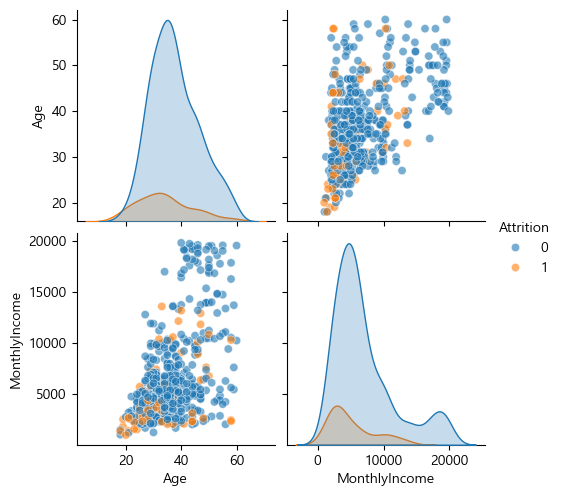

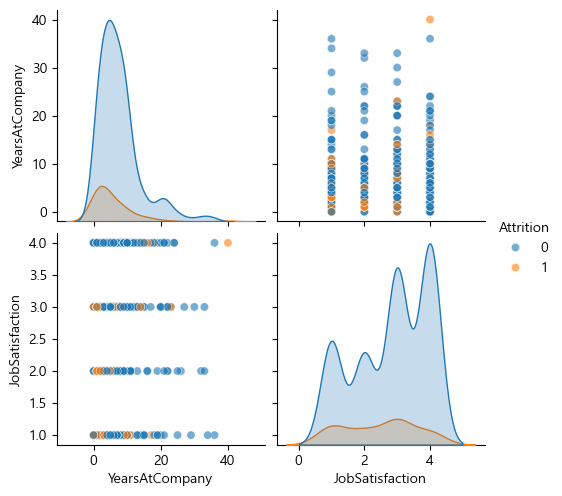

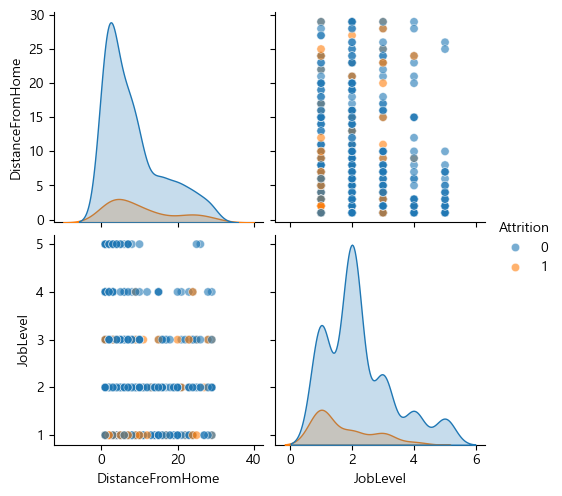

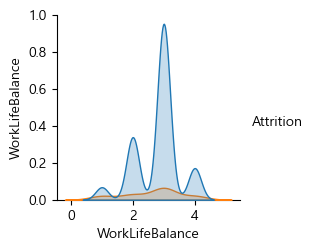

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('data/Employee_Attrition.csv')

# Attrition 숫자 변환
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 시각화에 쓸 컬럼 지정
selected_cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany',
    'JobSatisfaction', 'DistanceFromHome', 'JobLevel',
    'WorkLifeBalance'
]

# 샘플 추출
df_sampled = df[selected_cols + ['Attrition']].sample(n=500, random_state=42)

# 네 그룹으로 분할
col_groups = [
    ['Age', 'MonthlyIncome'],
    ['YearsAtCompany', 'JobSatisfaction'],
    ['DistanceFromHome', 'JobLevel'],
    ['WorkLifeBalance']
]

# 시각화 실행
for group in col_groups:
    sns.pairplot(df_sampled[group + ['Attrition']], hue='Attrition', plot_kws={'alpha': 0.6})
    plt.show()


## 07. 상관관계 및 교차분석

##### 상관관계
- JobLevel ↔ MonthlyIncome	0.95
- TotalWorkingYears ↔ JobLevel	0.78
- YearsAtCompany ↔ YearsWithCurrManager	0.77

##### Feature 후보

- OverTime: 초과근무 여부 (이직률과 시각적으로 명확한 차이 있음)
- JobRole: 직무별 이직률에 편차 있음
- : 소득이 낮을수록 이직률이 높음
- TotalWorkingYears, YearsAtCompany: 경력/근속 기간이 짧을수록 이직률 높음
- JobSatisfaction: 낮을수록 이직률 상승 가능성 있음
- Age: 젊은 연령층에서 이직이 잦을 수 있음

In [15]:
import pandas as pd

# 상관계수 계산
corr_matrix = df.corr(numeric_only=True)

# 절대값이 0.5 이상이고, 자기 자신은 제외
strong_corr = corr_matrix[(corr_matrix >= 0.5) & (corr_matrix < 1.0)]

# 상관계수가 존재하는 경우만 보기 좋게 출력
strong_corr_pairs = (
    strong_corr.stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# 중복 제거 (A-B와 B-A 중 하나만)
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Feature 1'] < strong_corr_pairs['Feature 2']]

# 상관계수 기준 정렬
strong_corr_pairs = strong_corr_pairs.sort_values(by='Correlation', ascending=False)

# 결과 출력
print(strong_corr_pairs)

pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')


                  Feature 1                Feature 2  Correlation
3                  JobLevel            MonthlyIncome     0.950300
4                  JobLevel        TotalWorkingYears     0.782208
9         PercentSalaryHike        PerformanceRating     0.773550
7             MonthlyIncome        TotalWorkingYears     0.772893
20           YearsAtCompany     YearsWithCurrManager     0.769212
18           YearsAtCompany       YearsInCurrentRole     0.758754
23       YearsInCurrentRole     YearsWithCurrManager     0.714365
1                       Age        TotalWorkingYears     0.680381
14        TotalWorkingYears           YearsAtCompany     0.628133
19           YearsAtCompany  YearsSinceLastPromotion     0.618409
22       YearsInCurrentRole  YearsSinceLastPromotion     0.548056
5                  JobLevel           YearsAtCompany     0.534739
8             MonthlyIncome           YearsAtCompany     0.514285
26  YearsSinceLastPromotion     YearsWithCurrManager     0.510224
0         

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


## 08. 데이터 전처리
- 결측치 제거/대체, 타입 변환, 불필요한 칼럼 제거

In [30]:
df = df.dropna()
df['Age'] = df['Age'].astype(int)


## 09. Feature Engineering
- 새로운 변수 생성, 그룹화, 로그변환, 스케일링 등

In [17]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25','26-35','36-45','46-60'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 백엔드 설정 (PyCharm에서 그래프 창 띄우기)
plt.switch_backend('tkAgg')

# 한글 깨짐 방지 (윈도우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 이직 여부 숫자 변환 (Yes: 1, No: 0)
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# AgeGroup별 평균 이직률 계산
agegroup_attrition = df.groupby('AgeGroup', observed=True)['Attrition_Flag'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Attrition_Flag', data=agegroup_attrition)
plt.title('나이대별 이직률')
plt.xlabel('나이 그룹')
plt.ylabel('이직률')
plt.ylim(0, 0.5)  # y축 범위 고정 (선택)
plt.tight_layout()
plt.show()




## 10. 최종 요약 및 인사이트 도출
- 주요 변수 통계 요약
    - Attrition (이직 여부)
        - Yes: 237명 (16%) / No: 1233명 (84%)
        - → 이 데이터셋은 클래스 불균형 데이터임 → 정확도(Accuracy)만으론 판단 어려움
    - Age (나이)
        - 평균: 약 37세 / 최빈값 구간: 30~40세
        - → 18–25세 이직률이 가장 높음 → 젊은 직원의 이직 성향 주의 필요
    - MonthlyIncome (월급)
        - 편차 크고, 고소득자 중 이직률 낮음
        - → 보상이 낮은 그룹에서 이직률이 높다는 경향
    - YearsAtCompany (근속 연수)
        - 평균: 약 7년, min=0
        - → 신입 및 근속 1~3년 사이에서 이직률 상대적으로 높음
    - OverTime (초과 근무 여부)
        - OverTime=Yes인 그룹의 이직률이 압도적으로 높음
        - → 과도한 야근 → 직원 이탈 가속 요인
    - JobSatisfaction (직무 만족도)
        - 낮은 만족도일수록 이직 확률 상승
        - → 비재무적 요인도 강력한 이직 유인
- 변수 간 영향력 확인
    - 강한 음의 상관관계
        - OverTime (Yes) ↔ Attrition=Yes: 초과근무가 이직을 유발
        - JobSatisfaction 낮음 ↔ Attrition=Yes: 직무 만족도는 중요한 지표
    - 강한 양의 상관관계
        - TotalWorkingYears ↔ MonthlyIncome: 경력이 쌓일수록 수입 증가
        - JobLevel ↔ MonthlyIncome: 직급이 높을수록 수입 증가
        - → 이 둘은 보상 예측에 유의미한 변수
    - 복합 영향
        - Age, YearsAtCompany, JobRole, OverTime이 결합적으로 이직에 영향
        - 단일 변수보다는 복합 Feature 조합 필요
- 분석/모델링에 필요한 방향 설정
    1. 전처리/불균형 처리
        - Attrition이 Yes가 16%로 적음 → 클래스 불균형 심함
        - 모델링 전에 SMOTE, ADASYN 등의 오버샘플링 필요 고려
        - 평가 지표는 F1-score, Recall 사용 권장 (Accuracy만으론 왜곡됨)
    2. 강력한 Feature 후보
        - 다음 변수들은 모델링에서 중요 Feature로 사용할 수 있음:
            - OverTime	초과근무와 이직 간 강한 음의 상관관계
            - MonthlyIncome	낮은 수입 그룹의 이직률 높음
            - JobSatisfaction	만족도 낮을수록 이직 증가
            - AgeGroup	젊은 층 이직률 높음
            - YearsAtCompany	근속 1~3년차 이직률 높음
            - DistanceFromHome	멀수록 이직률 증가 경향 있음
    3. 예측 모델 설계 방향
        - 이진 예측 분류 문제 (이진 분류)
        - LogisticRegression, RandomForest, XGBoost 등 적용 가능
        - 평가지표: Recall, Precision, F1-score
        - 임계값 조정 (threshold tuning)도 병행 필요




In [32]:
df.groupby('AgeGroup')['Attrition'].value_counts(normalize=True)


C:\Users\play data\AppData\Local\Temp\ipykernel_3620\3812665618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Attrition'].value_counts(normalize=True)


AgeGroup  Attrition
18-25     No           0.652174
          Yes          0.347826
26-35     No           0.808581
          Yes          0.191419
36-45     No           0.908120
          Yes          0.091880
46-60     No           0.875458
          Yes          0.124542
Name: proportion, dtype: float64